In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanchung403/dataset/main/train_data_titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#remove unnecessary columns
df.drop(["Name", "Ticket"], axis=1,  inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


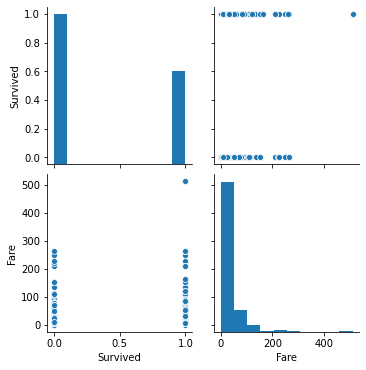

In [6]:
# 看關聯性
sns.pairplot(df[['Survived', 'Fare']], dropna=True)

In [7]:
# 看存活與各特徵的平均數分配
df.groupby("Survived").mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# 確認哪些欄位有空值
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
# 看哪個特徵缺值超過一半準備捨棄
df.isnull().sum() > len(df) * 0.5

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [12]:
df.drop("Cabin", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [13]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

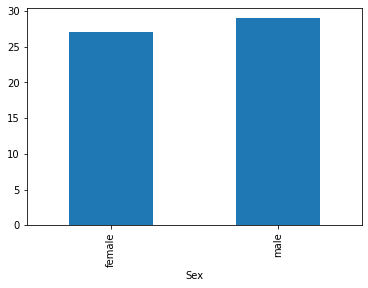

In [14]:
df.groupby('Sex')['Age'].median().plot(kind='bar')

In [15]:
# 看一下缺值狀況
df[['Sex','Age']]

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [16]:
df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [17]:
df.groupby('Sex')['Age'].transform('median')

0      29.0
1      27.0
2      27.0
3      27.0
4      29.0
       ... 
886    29.0
887    27.0
888    27.0
889    29.0
890    29.0
Name: Age, Length: 891, dtype: float64

In [18]:
# 填值
df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'), inplace=True)
df['Age'].isnull().sum()

0

In [19]:
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [20]:
# 取總計最多的數
df['Embarked'].value_counts().idxmax()

'S'

In [21]:
# 取眾數，有可能超過一個
df['Embarked'].mode()[0]

'S'

In [22]:
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
df['Embarked'].isnull().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [24]:
df = pd.get_dummies(data=df, dtype=int, columns=['Sex', 'Embarked'])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,27.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [25]:
df.drop('Sex_female', axis=1, inplace=True)

In [26]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161,0.095256,0.030385,-0.032994,-0.005855
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184
Sex_male,0.042939,-0.543351,0.131900,0.095256,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.030385,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,-0.032994,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421


In [27]:
X = df.drop(['Survived', 'Pclass'], axis=1)
y = df['Survived']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [30]:
predictions = lr.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0])

In [32]:
# Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

print("Accuracy:", accuracy_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))

Accuracy: 0.832089552238806
Recall: 0.7264150943396226
Precision: 0.8279569892473119


In [34]:
pd.DataFrame(confusion_matrix(y_test, predictions),
            columns = ['Predicted Not Survived', 'Predicted Survived'],
             index = ['True not Survived', 'True Survived']
            )



,Predicted Not Survived,Predicted Survived
True not Survived,146,16
True Survived,29,77


In [38]:
# model export
import joblib
joblib.dump(lr, "Titanic-20240128.pkl", compress=3)

['Titanic-20240128.pkl']